In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
temp_df = pd.read_csv('EIM_temp_final_2.csv', parse_dates=['datetime_'], index_col='datetime_')

In [3]:
temp_df.head(5)

,temp_
datetime_,
2020-11-08 17:00:00,25.5
2020-11-08 17:05:00,25.5
2020-11-08 17:10:00,25.6
2020-11-08 17:15:00,25.5
2020-11-08 17:20:00,25.5


In [4]:
temp_df.dtypes, temp_df.index.dtype


(temp_    float64
 dtype: object,
 dtype('<M8[ns]'))

In [5]:
temp_df.index

DatetimeIndex(['2020-11-08 17:00:00', '2020-11-08 17:05:00',
               '2020-11-08 17:10:00', '2020-11-08 17:15:00',
               '2020-11-08 17:20:00', '2020-11-08 17:25:00',
               '2020-11-08 17:30:00', '2020-11-08 17:35:00',
               '2020-11-08 17:40:00', '2020-11-08 17:45:00',
               ...
               '2020-11-11 07:45:00', '2020-11-11 07:50:00',
               '2020-11-11 07:55:00', '2020-11-11 08:00:00',
               '2020-11-11 08:05:00', '2020-11-11 08:10:00',
               '2020-11-11 08:15:00', '2020-11-11 08:20:00',
               '2020-11-11 08:25:00', '2020-11-11 08:30:00'],
              dtype='datetime64[ns]', name='datetime_', length=763, freq=None)

In [6]:
temp_df.index = pd.to_datetime(temp_df.index)
temp_df.index

DatetimeIndex(['2020-11-08 17:00:00', '2020-11-08 17:05:00',
               '2020-11-08 17:10:00', '2020-11-08 17:15:00',
               '2020-11-08 17:20:00', '2020-11-08 17:25:00',
               '2020-11-08 17:30:00', '2020-11-08 17:35:00',
               '2020-11-08 17:40:00', '2020-11-08 17:45:00',
               ...
               '2020-11-11 07:45:00', '2020-11-11 07:50:00',
               '2020-11-11 07:55:00', '2020-11-11 08:00:00',
               '2020-11-11 08:05:00', '2020-11-11 08:10:00',
               '2020-11-11 08:15:00', '2020-11-11 08:20:00',
               '2020-11-11 08:25:00', '2020-11-11 08:30:00'],
              dtype='datetime64[ns]', name='datetime_', length=763, freq=None)

In [7]:
temp_df[temp_df.isnull()].count()

temp_    0
dtype: int64

In [8]:
temp_df.describe()

,temp_
count,763.000000
mean,24.270380
std,0.854608
min,22.800000
25%,23.500000
50%,24.200000
75%,25.000000
max,25.900000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013FC53BBB48>],
      dtype=object)

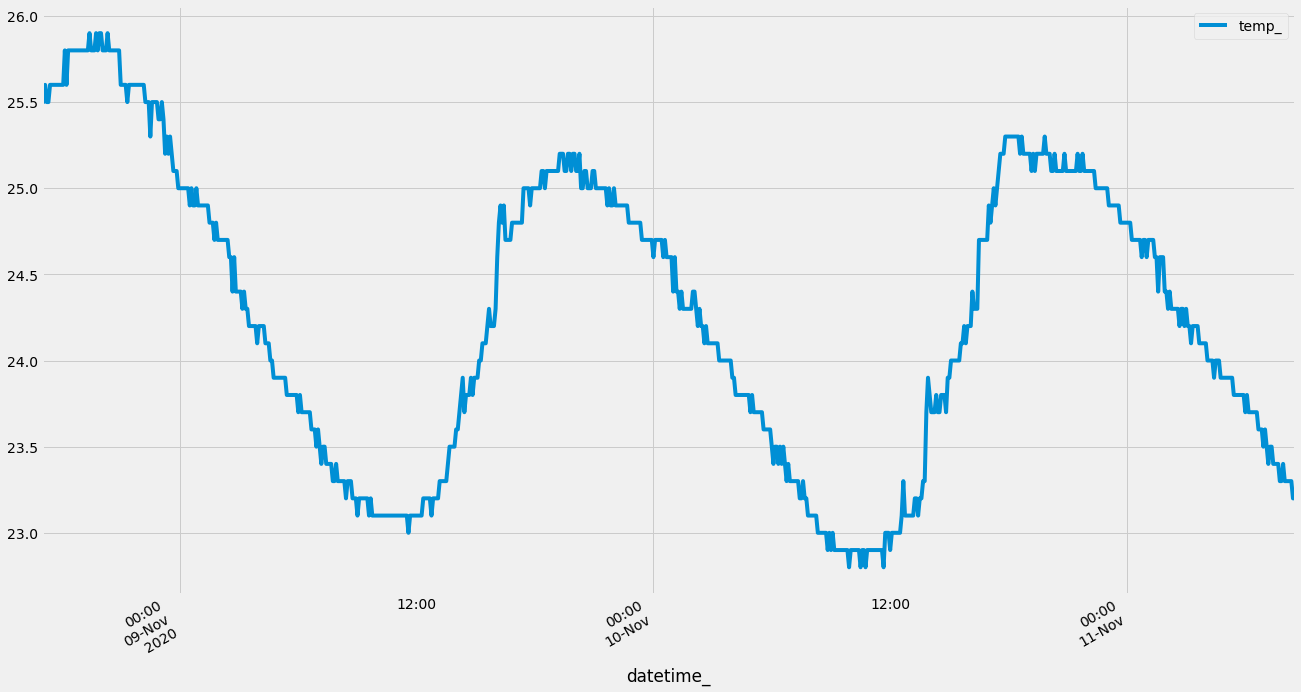

In [9]:
temp_df.plot(subplots=True, figsize=(20,12))

In [10]:
train_df=temp_df['20201108':'20201110']

In [11]:
test_df=temp_df['20201111']

In [12]:
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [13]:
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

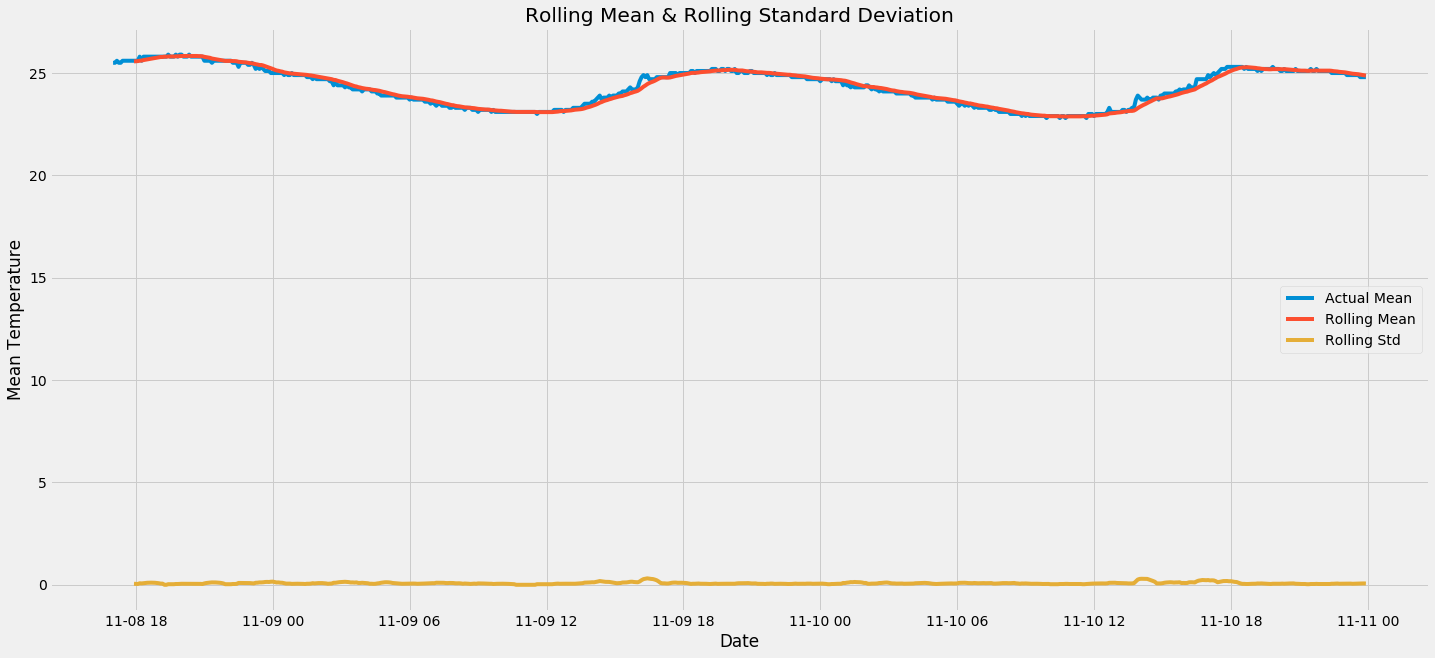

Test statistic:  -3.0923237182423406
Critical Values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}


In [14]:
plot_rolling_mean_std(train_df.temp_)
perform_dickey_fuller_test(train_df.temp_)

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


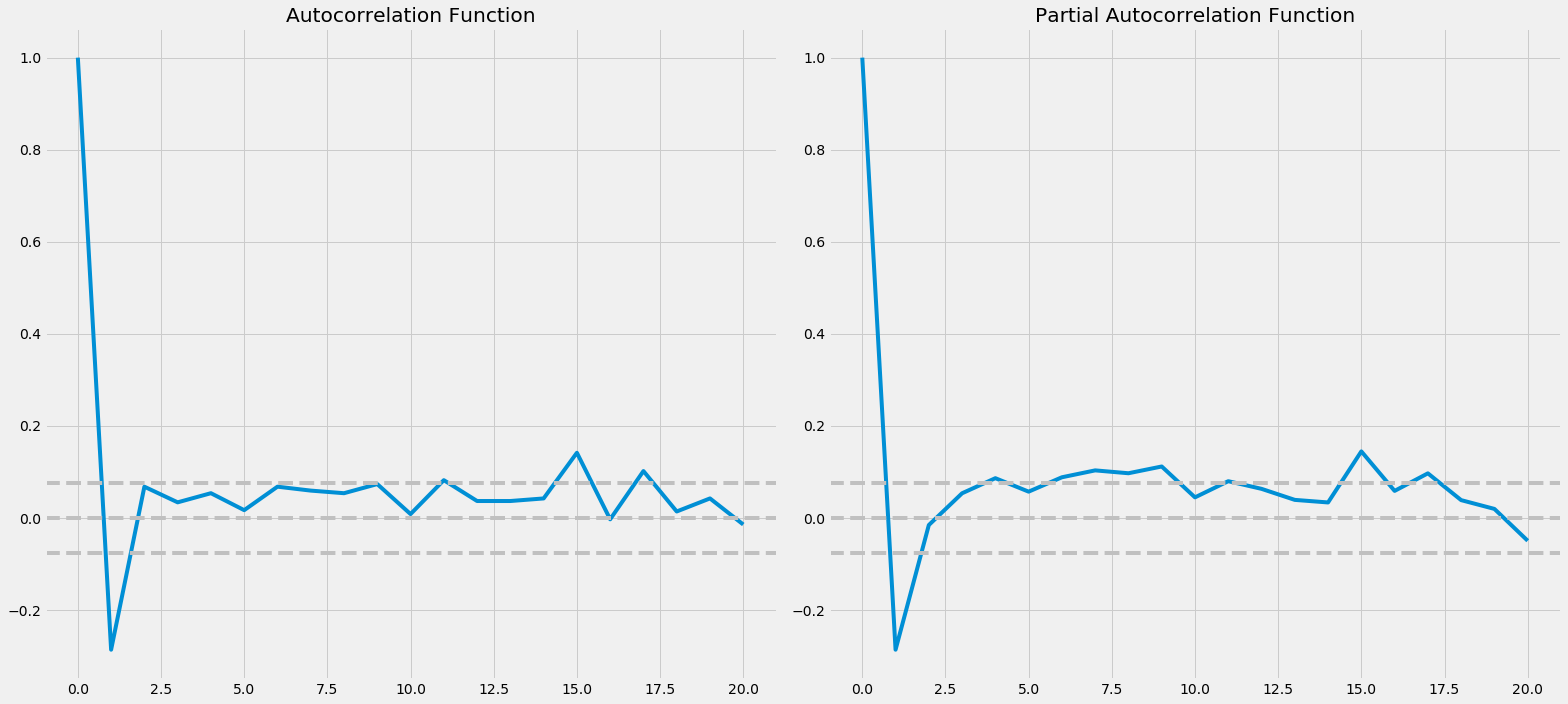

In [15]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [51]:
model = ARIMA(train_df.values, order=(3,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  659
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 843.721
Method:                       css-mle   S.D. of innovations              0.067
Date:                Wed, 25 Nov 2020   AIC                          -1671.441
Time:                        00:04:55   BIC                          -1635.516
Sample:                             1   HQIC                         -1657.516
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.007     -0.141      0.887      -0.015       0.013
ar.L1.D.y      0.0790      0.117      0.674      0.501      -0.151       0.309
ar.L2.D.y      0.9782      0.010    101.300      0.0

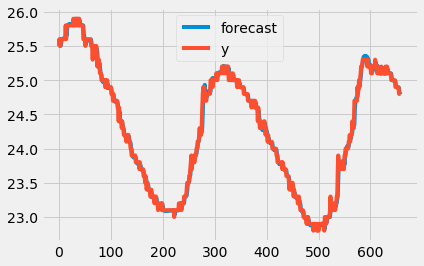

In [52]:
model_fit.plot_predict(dynamic=False)
plt.show()

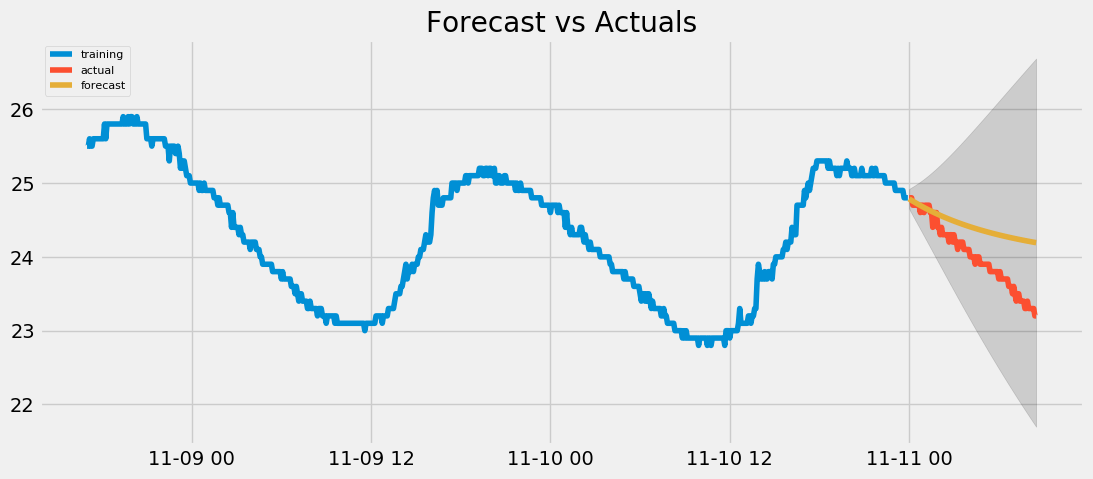

In [53]:
fc, se, conf = model_fit.forecast(103, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [45]:
test_df

,temp_
datetime_,
2020-11-11 00:00:00,24.8
2020-11-11 00:05:00,24.8
2020-11-11 00:10:00,24.8
2020-11-11 00:15:00,24.7
2020-11-11 00:20:00,24.7
...,...
2020-11-11 08:10:00,23.3
2020-11-11 08:15:00,23.3
2020-11-11 08:20:00,23.3


In [46]:
fc_series

datetime_
2020-11-11 00:00:00    24.786350
2020-11-11 00:05:00    24.774489
2020-11-11 00:10:00    24.765043
2020-11-11 00:15:00    24.753832
2020-11-11 00:20:00    24.744691
                         ...    
2020-11-11 08:10:00    24.204783
2020-11-11 08:15:00    24.201217
2020-11-11 08:20:00    24.198650
2020-11-11 08:25:00    24.195155
2020-11-11 08:30:00    24.192643
Length: 103, dtype: float64